**ids-pdl07-hwk.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the _Python Data Lab_ of the module _Introduction to Data Science_ offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated _module platform_.

# Homework assignments: Python scripts and functions

The homework assignments in this notebook supplement the tutorial *Python scripts and functions*.

- Solve the assignments according to the instructions.
- Upload the completed notebook to the module platform.
- Do not forget to enter your name in the markdown cell below.

The homework set carries a total of 20 points. Square brackets in the assignment titles specify individual point contributions.

## Name: Shayan Ali Khan

---
---

## Preparation

Import the NumPy module in the standard way (prefix `np`). From the matplotlib library import the package `pyplot` using the standard abbreviation `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On the module platform you find data files of the form `pdl07dat_SID.txt` where `SID` is a three-digit student ID, containing a set of polynomial coefficients for two of the assignments below.

- Identify the file `pdl07dat_SID.txt` with your personal student ID `SID`, then upload it to the working directory, i.e., the folder where this Jupyter notebook resides.
- The data file `pdl07dat_100.txt` and a solution file `pdl07sol_100.svg` are provided to demonstrate the assignments. Upload the files also to the working directory.

## Assignment:  Differencing of discrete variables [5]

The differencing operation can be applied to detect gaps in supposedly contiguous time series by taking the elements $t_0,t_1,t_2,...$ of the time array, and then check the differences $t_1-t_0,t_2-t_1,t_3-t_2,...$ for deviations from the nominal sampling time $\Delta t$. The code in the cell below constructs a time array with three gaps that are to be detected. Complete the code according to the instructions given as comments.

In [2]:
### Define time array.
Tsam = 0.1              #.. sampling interval
Tmax = 12.0             #.. end time of series 
Nt = int(Tmax/Tsam)+1   #.. nominal length

### Construct time array t with three gaps.
Nt12 = int(Nt/12)
t = np.array([])
for f in [0,4,8]:
    igap = np.random.randint((f+1)*Nt12,(f+3)*Nt12)
    print('Constructed gap time : {:.1f}'.format(Tsam*igap))
    t = np.concatenate([t,np.arange(f*Nt12,igap),np.arange(igap+1,(f+4)*Nt12)])
t = t*Tsam
print()
### Compute the array of differences dt.
dt = t[1:] - t[:-1]
### Create a boolean mask igaps with indices where dt is at least 50% larger than Tsam.
igaps = dt > 1.5*Tsam
### Create the array t_before_gaps listing the times immediately before the gaps.
t_before_gaps = np.array([0.0,0.0,0.0])
i = 0
for f in range(len(igaps)):
    if igaps[f] == True:
        t_before_gaps[i] = t[f]
        i += 1
### Add Tsam to t_before_gaps to obtain the array t_gaps with the proper gap times.
t_gaps = t_before_gaps + Tsam
### Print the detected gap times in the same format as the constructed gap times.
for f in range(3):
    print('Detected gap time : {:.1f}'.format(t_gaps[f]))

Constructed gap time : 2.2
Constructed gap time : 5.7
Constructed gap time : 9.4

Detected gap time : 2.2
Detected gap time : 5.7
Detected gap time : 9.4


## Assignment: Python scripts [4]

Create a new file `detect_gaps.py` to store a Python script. Take the set of instructions from the previous assigment *Differencing of NumPy Arrays* and store it in the script file. Add the necessary imports to make your script self-contained. Save the file and run the script to check if everything works as expected.

In [3]:
run detect_gaps

Constructed gap time : 1.7
Constructed gap time : 6.9
Constructed gap time : 9.3

Detected gap time : 1.7
Detected gap time : 6.9
Detected gap time : 9.3


## Assignment: Python functions [4]

Consider a polynomial in the canonical power series representation
$$
p(x) \; = \; C_0 + C_1 x + C_2 x^2 + \ldots + C_N x^N \; = \; \sum_{k=0}^N C_k x^k ~.
$$
The parameters $C_0,C_1,C_2,...$ are called polynomial coefficients. Since the derivative is given by
$$
p'(x) \; = \; C_1 + 2 C_2 x^2 + \ldots + N C_N x^{N-1} \; = \; \sum_{k=0}^{N-1} (k+1) C_{k+1} x^k ~,
$$
the coefficients $D_0,D_1,D_2,...$ in its canonical power series representation 
$$
p'(x) \; = \; D_0 + D_1 x + D_2 x^2 + \ldots + D_{N-1} x^{N-1} \; = \; \sum_{k=0}^{N-1} D_k x^k
$$
are related to the coefficients $C_0,C_1,C_2,...$ through the formula
$$
D_k \; = \; (k+1) \, C_{k+1} ~,~ k = 0,1,2,...,N-1 ~.
$$

In the code cell below, you find an incomplete Python function `polyderiv()`, accepting (on input) a list of the coefficients $C_0,C_1,...,C_N$ stored in the variable `coef`, and returning (as output) a list of the coefficients $D_0,D_1,...,D_{N-1}$. Complete the function `polyderiv()` and also the function calls in the Python code below by replacing `42` with correct variable names and instructions. Run the cell to check if you obtain the same results as the NumPy function `Polynomial.deriv()`. Note that the polynomial coefficients are read from the file `pdl07dat_SID.txt` where `SID` is your personal three-digit student ID.

In [4]:
def polyderiv(coef):
    '''
    Compute the coefficients of a polynomial derivative.
    Arguments
    * coef  : list of polynomial coefficients (in ascending order).
    On return
    * dcoef  : list of coefficients of polynomial derivative.
    '''
    ### Using a list comprehension, compute coefficients dcoef.
    dcoef = [coef[i] * i for i in range(1, len(coef))]
    return dcoef

### Required imports.
import numpy as np
from numpy.polynomial import Polynomial

### Test the code with SID=100, then use your personal student ID for the final run of the notebook.
SID = 244

### Read from a file the coefficients of the polynomial p = p(x).
p0coef = np.loadtxt('pdl07dat_'+str(SID)+'.txt')
print('Polynomial coefficients : ',p0coef)
print()

### Create the polynomial object p0 using NumPy's function Polynomial().
p0 = Polynomial(p0coef)
print('Polynomial p(x) : ')
display(p0)
print()

### Compute coefficients of the first derivative.
p1coef = polyderiv(p0coef)
print("First derivative p'(x) from own function polyderiv() : ")
p1 = Polynomial(p1coef)
display(p1)
print("First derivative p'(x) from NumPy's Polynomial.deriv() : ")
display(p0.deriv(m=1))
print()

### Compute coefficients of the second derivative.
p2coef = polyderiv(p1coef)
print("Second derivative p''(x) from own function polyderiv() : ")
display(Polynomial(p2coef))
print("Second derivative p''(x) from NumPy's Polynomial.deriv() : ")
display(p0.deriv(m=2))

Polynomial coefficients :  [-129.6  140.4    3.6  -14.7    0.     0.3]

Polynomial p(x) : 


Polynomial([-129.6,  140.4,    3.6,  -14.7,    0. ,    0.3], domain=[-1,  1], window=[-1,  1])


First derivative p'(x) from own function polyderiv() : 


Polynomial([140.4,   7.2, -44.1,   0. ,   1.5], domain=[-1,  1], window=[-1,  1])

First derivative p'(x) from NumPy's Polynomial.deriv() : 


Polynomial([140.4,   7.2, -44.1,   0. ,   1.5], domain=[-1.,  1.], window=[-1.,  1.])


Second derivative p''(x) from own function polyderiv() : 


Polynomial([  7.2, -88.2,   0. ,   6. ], domain=[-1,  1], window=[-1,  1])

Second derivative p''(x) from NumPy's Polynomial.deriv() : 


Polynomial([  7.2, -88.2,   0. ,   6. ], domain=[-1.,  1.], window=[-1.,  1.])

## Assignment: Function imports [7]

Suppose an ordinary function $f = f(x)$ is approximated by discrete values $f_0,f_1,f_2,\ldots$ on an equidistant numerical grid with grid spacing $\Delta x$. Using centered finite differences, the second derivative $f''(x) = \frac{\mathrm{d}^2 f}{\mathrm{d} x^2}$ is approximated in the interior of the numerical grid by the values
$$
f^{\ast\ast}_j \; = \; \frac{f_{j+1}-2f_j+f_{j-1}}{(\Delta x)^2} ~,~ j=1,2,\ldots ~.
$$
This finite differencing approximation of the second derivative is implemented in function `eqdistdif2()` below.

In [5]:
def eqdistdif2(f,deltax=1):
    '''
    Centered differencing approximation of the second derivative 
    for the interior points of an equidistant grid.
    Arguments
    * f       : grid function.
    Keyword arguments
    * deltax  : grid spacing.
    On return
    * d2fodx2 : approximation of the second derivative.
    '''
    d2f = f[2:] - 2*f[1:-1] + f[:-2]
    d2fodx2 = d2f/(deltax**2)
    return d2fodx2

Create a module file named `eqd2.py` containing this function `eqdistdif2()` together with the two functions `eqdistgrid()` and `eqdistdif1()` from the associated tutorial notebook. Complete the code in the following cell to produce a graphics in the same format as the one shown below for the sample set of coefficients (`SID=100`).

![](pdl07sol_100.svg)

Using the polynomial coefficients read from the file `pdl07dat_SID.txt` where `SID` is your personal three-digit student ID, run the complete code in the following cell to check if the module file `eqd2.py` was correctly created and saved.

Polynomial coefficients :  [-129.6  140.4    3.6  -14.7    0.     0.3]



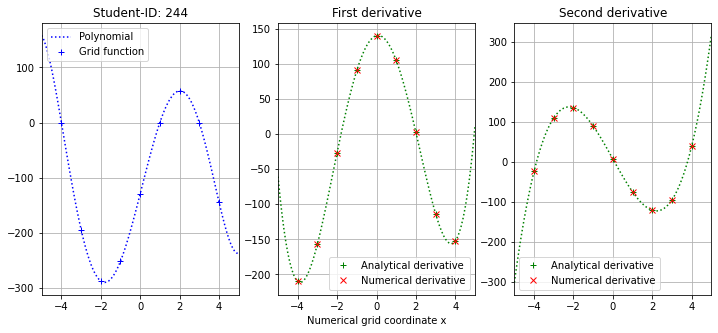

In [10]:
### Test the code with SID=100, then use your personal student ID for the final run of the notebook.
SID = 244

### Required imports.
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import eqd2

### Read from a file the coefficients of the polynomial p = p(x).
p0coef = np.loadtxt('pdl07dat_'+str(SID)+'.txt')
print('Polynomial coefficients : ',p0coef)
print()

### Open a figure object with three subplots.
fig,axs = plt.subplots(1,3,figsize=(12,5))

### Define numerical grid xgrd and its interior xint.
xgrd = eqd2.eqdistgrid(-5,11,deltax=1)
xint = xgrd[1:-1]

### Define an additional finely resolved grid only for line plots.
xplt = np.linspace(-5,5,101)

### Left plot panel: polynomial p(x).
p0obj = Polynomial(p0coef)
axs[0].plot(xplt,p0obj(xplt),'b:',label='Polynomial')
### Add here the command to plot the grid function.
axs[0].plot(xint,p0obj(xint),'b+',label='Grid function')
axs[0].set_title('Student-ID: {}'.format(SID))
axs[0].set_xlim((-5,5))
### Add grid and legend.
axs[0].legend(loc = 'upper left')
axs[0].grid()
### Center plot panel: first derivative p'(x).
p1num = eqd2.eqdistdif1(p0obj(xgrd),deltax=1)
axs[1].plot(xplt,p0obj.deriv(m=1)(xplt),'g:')
axs[1].plot(xint,p0obj.deriv(m=1)(xint),'g+',label='Analytical derivative')
### Add here the plot of the numerical first derivative.
axs[1].plot(xint,p0obj.deriv(m=1)(xint), 'rx', label = 'Numerical derivative')
axs[1].set_title('First derivative')
axs[1].set_xlabel('Numerical grid coordinate x')
axs[1].set_xlim((-5,5))
### Add grid and legend.
axs[1].legend(loc = 'lower right')
axs[1].grid()
### Right plot panel: second derivative p''(x).
p2num = eqd2.eqdistdif2(p0obj(xgrd),deltax=1)
### Add here the line plot (green, dotted) of the analytical second derivative.
axs[2].plot(xplt,p0obj.deriv(m=2)(xplt),'g:')
axs[2].plot(xint,p0obj.deriv(m=2)(xint),'g+',label='Analytical derivative')
### Add here the plot of the numerical second derivative.
axs[2].plot(xint,p0obj.deriv(m=2)(xint), 'rx', label = 'Numerical derivative')
axs[2].set_title('Second derivative')
axs[2].set_xlim((-5,5))
### Add grid and legend.
axs[2].legend(loc = 'lower left')
axs[2].grid()
### Save figure to svg file.
fig.savefig('pdl07sol_'+str(SID)+'.svg')

---
---